In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
discode=pd.read_csv("..//..//..//data//Data/RawData//discipline_code.csv")
discode = discode.set_index('Code_Discipline')['ESpecialite'].to_dict()
pubs_author_funder=pubs_author_funder.replace({'discipline':discode})
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],Computers,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9
2,30574691,[Russia],[Russia],Mechanical Engineering,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",General Mathematics,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],General Mathematics,2009,0.410,3


In [18]:
dis_funder=pubs_author_funder[['discipline','funder_country']]
dis_funder=dis_funder[dis_funder.funder_country.notnull()]

In [19]:
dis_funder=dis_funder.explode('funder_country')
dis_funder.head()

,discipline,funder_country
0,Computers,Turkey
1,Mechanical Engineering,United States
1,Mechanical Engineering,United States
1,Mechanical Engineering,United States
1,Mechanical Engineering,United States


In [20]:
dis_funder=dis_funder.groupby(['discipline','funder_country']).size()
dis_funder.head()

discipline  funder_country
Acoustics   Algeria            10
            Argentina          98
            Armenia             6
            Australia         652
            Austria           253
dtype: int64

In [21]:
dis_funder=dis_funder.reset_index()
dis_funder.columns=['discipline','funder_country','unit']
dis_funder.head()

,discipline,funder_country,unit
0,Acoustics,Algeria,10
1,Acoustics,Argentina,98
2,Acoustics,Armenia,6
3,Acoustics,Australia,652
4,Acoustics,Austria,253


In [22]:
dis_funder = dis_funder.pivot(index='discipline',columns='funder_country',values='unit')

In [27]:
dis_total = dis_funder.sum(axis=1).reset_index()
dis_total.columns=['discipline','units']
dis_total=dis_total.sort_values(by='units',ascending=False)
dis_total

,discipline,units
40,General Biomedical Research,1281591.0
54,Materials Science,1190705.0
13,Biochemistry & Molecular Biology,947716.0
85,Physical Chemistry,874873.0
68,Neurology & Neurosurgery,864369.0
...,...,...
65,Miscellaneous Physics,18042.0
7,Anesthesiology,15093.0
6,Anatomy & Morphology,12353.0
42,General Engineering,11736.0


In [28]:
dis_funder=dis_funder.fillna(0)
dis_funder.head()

funder_country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
discipline,,,,,,,,,,,,,,,,,,,,,
Acoustics,0.0,0.0,10.0,0.0,0.0,98.0,6.0,652.0,253.0,0.0,...,10341.0,6.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,1.0
Addictive Diseases,0.0,0.0,0.0,0.0,0.0,69.0,0.0,2271.0,21.0,0.0,...,27533.0,5.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
Aerospace Technology,0.0,0.0,0.0,0.0,0.0,84.0,2.0,239.0,63.0,0.0,...,4626.0,2.0,4.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0
Agricult & Food Science,1.0,3.0,124.0,0.0,1.0,5318.0,0.0,8508.0,661.0,2.0,...,32505.0,259.0,1.0,1.0,0.0,111.0,303.0,0.0,4.0,67.0
Allergy,0.0,0.0,2.0,0.0,0.0,11.0,0.0,715.0,542.0,0.0,...,11771.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0


In [29]:
dis_funder=dis_funder.div(dis_funder.sum(axis=1), axis=0)
dis_funder.head()

funder_country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
discipline,,,,,,,,,,,,,,,,,,,,,
Acoustics,0.000000,0.000000,0.000251,0.0,0.000000,0.002465,0.000151,0.016397,0.006363,0.000000,...,0.260059,0.000151,0.000000,0.000000,0.0,0.000000,0.000528,0.0,0.000000,0.000025
Addictive Diseases,0.000000,0.000000,0.000000,0.0,0.000000,0.001607,0.000000,0.052883,0.000489,0.000000,...,0.641137,0.000116,0.000000,0.000000,0.0,0.000000,0.000256,0.0,0.000000,0.000000
Aerospace Technology,0.000000,0.000000,0.000000,0.0,0.000000,0.003009,0.000072,0.008561,0.002257,0.000000,...,0.165711,0.000072,0.000143,0.000000,0.0,0.000000,0.000573,0.0,0.000000,0.000000
Agricult & Food Science,0.000003,0.000009,0.000367,0.0,0.000003,0.015755,0.000000,0.025206,0.001958,0.000006,...,0.096299,0.000767,0.000003,0.000003,0.0,0.000329,0.000898,0.0,0.000012,0.000198
Allergy,0.000000,0.000000,0.000066,0.0,0.000000,0.000363,0.000000,0.023608,0.017896,0.000000,...,0.388661,0.000066,0.000000,0.000000,0.0,0.000000,0.000099,0.0,0.000000,0.000033


In [16]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [17]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index()
cntry_out.columns=['country','unit_out']
cntry_out=cntry_out.sort_values(by="unit_out", ascending=False)
cntry_out=cntry_out[cntry_out.country!="EU"]
top20_df=cntry_out.head(30)
cntry_top20=top20_df.country

In [37]:
dis30 = dis_total.head(30).discipline.values

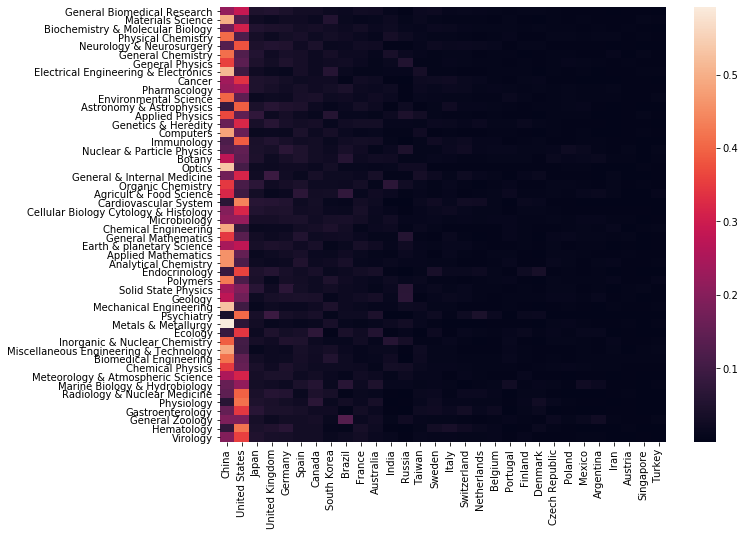

In [42]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    dis_funder.loc[dis30, cntry_top20].values, annot=False,
    fmt=".2f",xticklabels=cntry_top20, yticklabels=dis30)
plt.savefig("discipline.pdf", format="pdf",bbox_inches="tight")